In [1]:
from typing import Annotated
import operator,json
from typing import TypedDict, Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")

c:\Users\HP\anaconda3\envs\ten\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
llm.invoke("Hii")

AIMessage(content='Hi there! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-37e8c0a4-daeb-4935-8706-d7ef19612bfa-0', usage_metadata={'input_tokens': 2, 'output_tokens': 11, 'total_tokens': 13, 'input_token_details': {'cache_read': 0}})

# Custom human intervention

In [4]:
# Basic tool/Basic tool

@tool
def multiply(first_number:int, second_number:int)->int:
    """multiply two integer number"""
    return first_number * second_number

In [5]:
multiply({"first_number":24,"second_number":364})

C:\Users\HP\AppData\Local\Temp\ipykernel_10008\2089873997.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  multiply({"first_number":24,"second_number":364})


8736

In [6]:
multiply.invoke({"first_number":24,"second_number":364})

8736

In [7]:
# Complex tool (consider it expensive)

@tool
def search(query:str):
    """perform the web search on the user query"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return result
     

In [8]:
search("who is a current president of USA?")

[{'url': 'https://www.usa.gov/presidents',
  'content': 'Vice president of the United States\nThe vice president of the United States presides over the U.S. Senate and takes over the role of president of the United States if the president is unable to perform his or her duties. President of the United States\nThe president of the United States is the:\nCurrent president\nThe 46th and current president of the United States is Joseph R. Biden, Jr. First lady\nThe First lady of the United States has traditionally been the wife or other close female relative of the president of the United States. Requirements to be eligible to become president\nAccording to Article II of the U.S. Constitution, the president must:\nLearn about the U.S. presidential election process.\n If the vice president is not able to fulfill the duties of president, the role is passed to another leader in the order of presidential succession.\n'},
 {'url': 'https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_

In [9]:
search.invoke("who is a current president of USA?")

[{'url': 'https://www.usa.gov/presidents',
  'content': 'Vice president of the United States\nThe vice president of the United States presides over the U.S. Senate and takes over the role of president of the United States if the president is unable to perform his or her duties. President of the United States\nThe president of the United States is the:\nCurrent president\nThe 46th and current president of the United States is Joseph R. Biden, Jr. First lady\nThe First lady of the United States has traditionally been the wife or other close female relative of the president of the United States. Requirements to be eligible to become president\nAccording to Article II of the U.S. Constitution, the president must:\nLearn about the U.S. presidential election process.\n If the vice president is not able to fulfill the duties of president, the role is passed to another leader in the order of presidential succession.\n'},
 {'url': 'https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_

In [10]:
# Tool kit
tools=[search,multiply]

In [11]:
model_with_tools = llm.bind_tools(tools)

In [12]:
tool_mapping={tool.name: tool for tool in tools} # Map the name of the tool with the tool

In [13]:
tool_mapping

{'search': StructuredTool(name='search', description='perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000017721A97880>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000017721A97D00>)}

In [14]:
response = model_with_tools.invoke("who is a current president of USA?")

In [15]:
response # tably

AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "current president of USA"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-1df97b20-527d-4aa9-a732-2d361ddacecb-0', tool_calls=[{'name': 'search', 'args': {'query': 'current president of USA'}, 'id': 'c33a9a0c-5a69-4e01-8f62-ab120d65e079', 'type': 'tool_call'}], usage_metadata={'input_tokens': 100, 'output_tokens': 6, 'total_tokens': 106, 'input_token_details': {'cache_read': 0}})

In [16]:
print(response.additional_kwargs)

{'function_call': {'name': 'search', 'arguments': '{"query": "current president of USA"}'}}


In [17]:
print(response.tool_calls)

[{'name': 'search', 'args': {'query': 'current president of USA'}, 'id': 'c33a9a0c-5a69-4e01-8f62-ab120d65e079', 'type': 'tool_call'}]


In [18]:
tool_details = response.tool_calls # Which tool is required for particular answer

In [19]:
tool_details

[{'name': 'search',
  'args': {'query': 'current president of USA'},
  'id': 'c33a9a0c-5a69-4e01-8f62-ab120d65e079',
  'type': 'tool_call'}]

In [20]:
tool_details[0]["name"]

'search'

In [21]:
tool_details[0]["args"]

{'query': 'current president of USA'}

In [22]:
tool_mapping[tool_details[0]["name"]].invoke(tool_details[0]["args"])

[{'url': 'https://www.usa.gov/presidents',
  'content': 'Vice president of the United States\nThe vice president of the United States presides over the U.S. Senate and takes over the role of president of the United States if the president is unable to perform his or her duties. President of the United States\nThe president of the United States is the:\nCurrent president\nThe 46th and current president of the United States is Joseph R. Biden, Jr. First lady\nThe First lady of the United States has traditionally been the wife or other close female relative of the president of the United States. Requirements to be eligible to become president\nAccording to Article II of the U.S. Constitution, the president must:\nLearn about the U.S. presidential election process.\n If the vice president is not able to fulfill the duties of president, the role is passed to another leader in the order of presidential succession.\n'},
 {'url': 'https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_

In [23]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [24]:
def invoke_model(state:AgentState):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]} # Ouput as details about tool , no content

In [25]:
def invoke_tool(state: AgentState):
    tool_details = state['messages'][-1].tool_calls[0]  # Fetch tool details

    if tool_details is None:
        raise Exception("No tool call found")

    # Which tool i am calling
    selected_tool = tool_details["name"]
    print(f'Selected tool: {selected_tool}')

    if selected_tool == "search":  # If tool call is search
        response = input(prompt="[y/n] Continue with expensive web search?") # prompt the response
        if response.lower() == "n":
            raise Exception("Web search discarded")

    # Final tool invocation
    response = tool_mapping[selected_tool].invoke(tool_details["args"])
    return {"messages": [response]}

In [26]:
# If inside the message we have tool call , then it will return the tool
def router(state: AgentState):
    tool_calls = state['messages'][-1].tool_calls
    if tool_calls:
        return "tool"
    return "end"

In [27]:
graph = StateGraph(AgentState) ### StateGraph with AgentState

graph.add_node("ai_assistant", invoke_model)

graph.add_node("tool", invoke_tool)

In [28]:
graph.add_conditional_edges("ai_assistant", router, {"tool": "tool","end": END,})

graph.add_edge("tool", END) # Tool generated

# graph.add_edge("tool", "ai_assistant") # Ai generated

graph.set_entry_point("ai_assistant")

In [29]:
app = graph.compile()

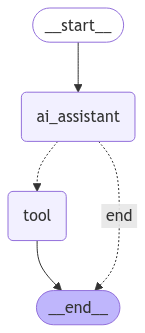

In [30]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
for s in app.stream({"messages": ["Who is the upcoming president of the USA?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "who is the upcoming president of the USA?"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-99650f49-e2d0-4701-8306-7d769f9c3965-0', tool_calls=[{'name': 'search', 'args': {'query': 'who is the upcoming president of the USA?'}, 'id': 'ea5be565-fa8a-4a68-a336-d2b18133246f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 101, 'output_tokens': 11, 'total_tokens': 112, 'input_token_details': {'cache_read': 0}})]}
-

In [32]:

for s in app.stream({"messages": ["what is multiplication of 23 and 46?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"second_number": 46.0, "first_number": 23.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-3e402c7f-34fc-41e8-9ce7-d82df3b20cb2-0', tool_calls=[{'name': 'multiply', 'args': {'second_number': 46.0, 'first_number': 23.0}, 'id': '3fb541a3-6439-4baa-91fd-2e107821ef5f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 104, 'output_tokens': 7, 'total_tokens': 111, 'input_token_details': {'cache_read': 0}})]}
----
Selected to

# Inbuilt Langgraph logic:
LangGraph supports human-in-the-loop workflows in a number of ways. In this section, we will use LangGraph's interrupt_before functionality to always break the tool node.

In [33]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")

In [34]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

In [35]:
tavily=TavilySearchResults()

In [36]:
tools = [tavily]

In [37]:
llm_with_tools = llm.bind_tools(tools)

In [38]:
def ai_assistant(state: AgentState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [39]:
memory = MemorySaver()

In [40]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("ai_assistant", ai_assistant)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [41]:
graph_builder.add_edge(START, "ai_assistant")

graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools", "ai_assistant")

In [42]:
app2 = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"], #whenever my execution will come to the tool until user gives permission
    # Note: can also interrupt __after__ tools, if desired.
    # interrupt_after=["tools"]
)

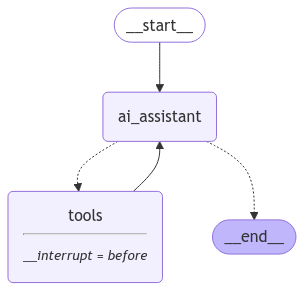

In [43]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [44]:
user_input = "what is current a capital of india?"
config = {"configurable": {"thread_id": "1"}}

In [45]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [46]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

# It is tool call, it interrupt the process

================================ Human Message =================================

what is current a capital of india?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (e14b0d53-befe-4138-8b10-2e58a93ceb24)
 Call ID: e14b0d53-befe-4138-8b10-2e58a93ceb24
  Args:
    query: capital of india


In [47]:
# WHere it has got interrupt
snapshot = app2.get_state(config)

In [48]:
snapshot.next #tool is the next process

('tools',)

In [49]:
last_message=snapshot.values["messages"][-1] # tool detail

In [50]:
last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'capital of india'},
  'id': 'e14b0d53-befe-4138-8b10-2e58a93ceb24',
  'type': 'tool_call'}]

In [51]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")
# for allowing , just simply give none

In [52]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()
# esily picking up the name because of memory

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (e14b0d53-befe-4138-8b10-2e58a93ceb24)
 Call ID: e14b0d53-befe-4138-8b10-2e58a93ceb24
  Args:
    query: capital of india
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.geeksforgeeks.org/what-is-the-capital-city-of-india/", "content": "The capital city of India is New Delhi, situated in the northern part of the country. It was officially declared the capital of India in 1911 during British rule, replacing Kolkata. New Delhi serves as the political, cultural, and administrative center of India. The city is renowned for its rich history, diverse culture, and architectural"}, {"url": "https://www.worldatlas.com/articles/what-is-the-capital-of-india.html", "content": "Related\nThe Largest Empires In The History Of India\nBiggest Ethnic Groups In India\nMore in World Facts\nThe Larg

In [57]:
# Give my own input
user_input = "give me the recent news of it?"

config = {"configurable": {"thread_id": "1"}}

In [58]:

# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [59]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

give me the recent news of it?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (3d6b6492-1692-4a82-b1f4-241509521e72)
 Call ID: 3d6b6492-1692-4a82-b1f4-241509521e72
  Args:
    query: recent news of New Delhi


In [60]:
snapshot=app2.get_state(config)

In [61]:
current_message = snapshot.values["messages"][-1]

In [62]:
current_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (3d6b6492-1692-4a82-b1f4-241509521e72)
 Call ID: 3d6b6492-1692-4a82-b1f4-241509521e72
  Args:
    query: recent news of New Delhi


In [63]:
tool_call_id = current_message.tool_calls[0]["id"] 

In [64]:
tool_call_id # GEt the call id

'3d6b6492-1692-4a82-b1f4-241509521e72'

In [65]:
from langchain_core.messages import AIMessage, ToolMessage

In [66]:
answer = "it is just related to raining which is happing on daily basis"

In [67]:

new_messages = [
    ToolMessage(content=answer, tool_call_id=tool_call_id), # Tool message append with tool id
    AIMessage(content=answer),
]

In [68]:
app2.update_state(
    config,
    {"messages": new_messages},
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efd8f9d-65c5-6653-8007-29cbb6a098ed'}}

In [69]:
print(app2.get_state(config).values["messages"][-1:])

[AIMessage(content='it is just related to raining which is happing on daily basis', additional_kwargs={}, response_metadata={}, id='00049960-8151-4ef3-ae0c-daec66fa35e8')]
